# PRE TERM BIRTH PREDICTION USING STACKED CLASSIFIER & ANN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\nithi\Downloads\preterm.csv")

In [3]:
df

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
0,11055,218320,53231.010,1.860,2,1
1,9118,222820,62367.488,1.580,2,1
2,7925,13481,60503.050,2.067,2,1
3,12451,17474,53628.078,1.731,2,1
4,11152,218320,53317.910,1.857,2,1
5,6029,63781,59177.965,1.701,2,1
6,10052,22310,54431.030,1.790,2,1
7,9101,219830,63467.583,1.490,2,1
8,7929,13192,61503.160,2.067,2,1
9,12452,16473,54678.091,1.701,2,1


In [4]:
df.head

<bound method NDFrame.head of     Count Contraction  lenght of contraction        STD  Entropy  \
0               11055                 218320  53231.010    1.860   
1                9118                 222820  62367.488    1.580   
2                7925                  13481  60503.050    2.067   
3               12451                  17474  53628.078    1.731   
4               11152                 218320  53317.910    1.857   
5                6029                  63781  59177.965    1.701   
6               10052                  22310  54431.030    1.790   
7                9101                 219830  63467.583    1.490   
8                7929                  13192  61503.160    2.067   
9               12452                  16473  54678.091    1.701   
10              11121                 228321  52901.880    1.777   
11               6179                  65782  62177.988    1.991   
12               2012                  12483  32901.880    0.901   
13               1

In [5]:
df.shape

(58, 6)

In [6]:
df.columns

Index(['Count Contraction', 'lenght of contraction', 'STD', 'Entropy',
       'Contraction times', 'Pre-term'],
      dtype='object')

In [7]:
df.describe()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,2503.810345,26621.965517,48564.968190,0.879759,0.637931,0.327586
std,3788.639864,61527.769917,8952.845551,0.528180,0.809988,0.473432
min,222.000000,2308.000000,29205.840000,0.428000,0.000000,0.000000
25%,398.000000,2649.500000,42303.962500,0.490500,0.000000,0.000000
50%,495.000000,3371.500000,49307.490000,0.586000,0.000000,0.000000
75%,1988.750000,12093.750000,54374.865000,1.187500,1.000000,1.000000
max,12452.000000,228321.000000,63467.583000,2.067000,2.000000,1.000000


# DATA PRE PROCESSING

In [8]:
df.isnull().sum()

Count Contraction        0
lenght of contraction    0
STD                      0
Entropy                  0
Contraction times        0
Pre-term                 0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.nunique()

Count Contraction        44
lenght of contraction    46
STD                      49
Entropy                  47
Contraction times         3
Pre-term                  2
dtype: int64

In [11]:
df["Contraction times"].value_counts()

0    33
1    13
2    12
Name: Contraction times, dtype: int64

In [12]:
df['Pre-term'].value_counts()

0    39
1    19
Name: Pre-term, dtype: int64

# DATA ANALYSIS/ VISUALIZATION

# HISTOGRAM - DATA DISTRIBUTION

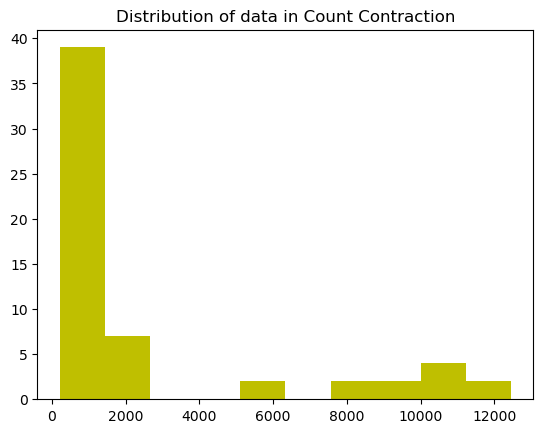

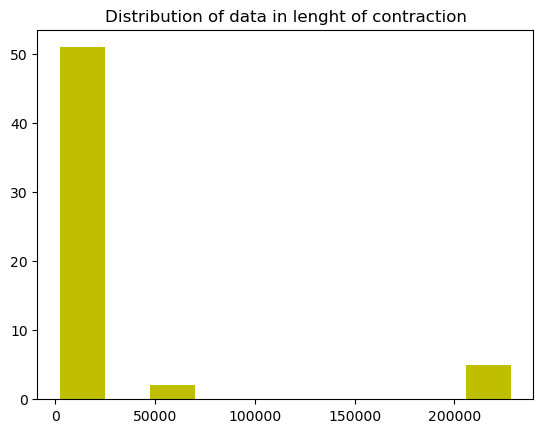

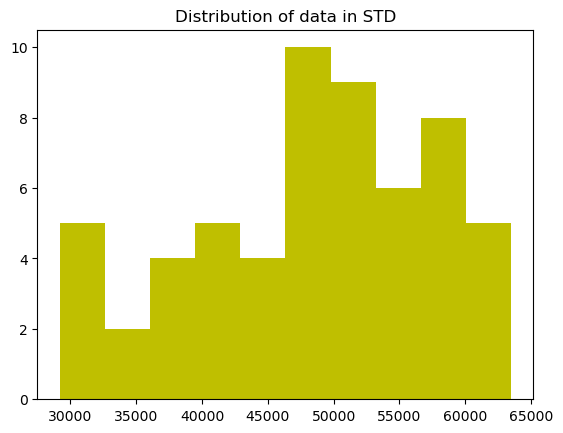

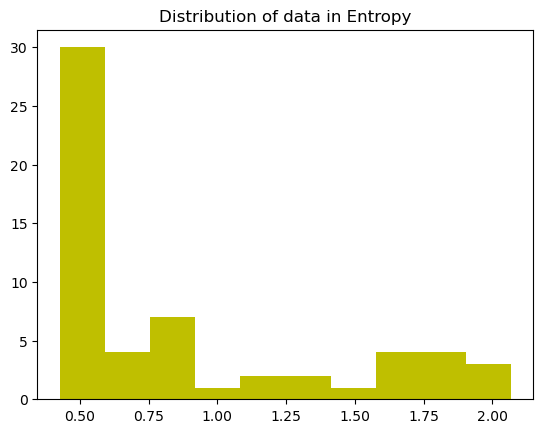

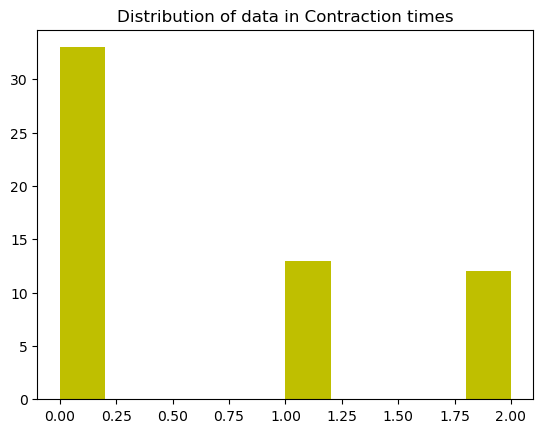

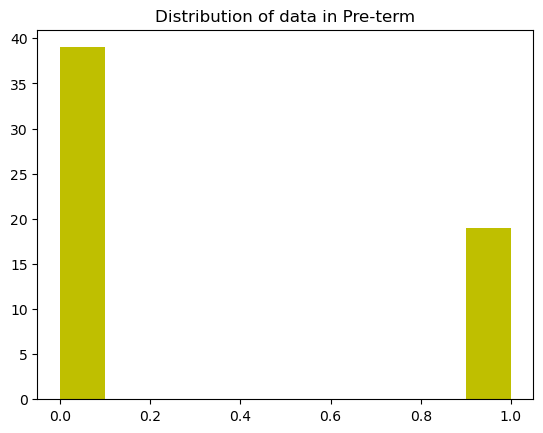

In [16]:
for x in df.columns:
    plt.hist(df[x],bins=10,color='y')
    plt.title("Distribution of data in " + x)
    plt.show()

# BOXPLOT - FOR DETECTING OUTLIERS

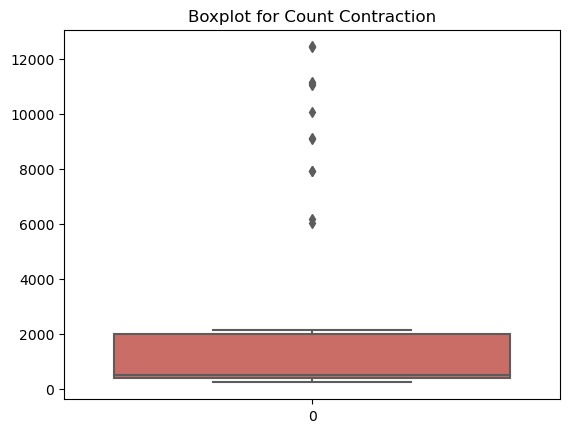

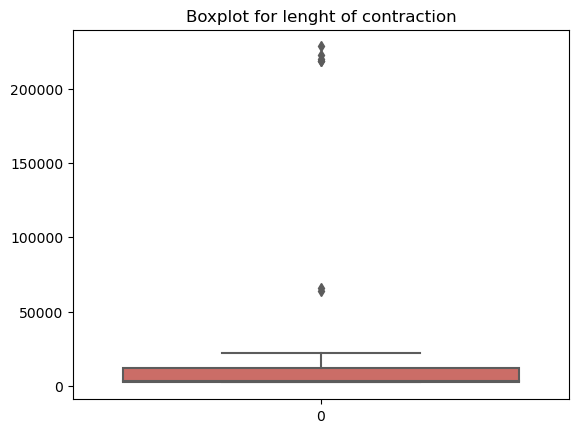

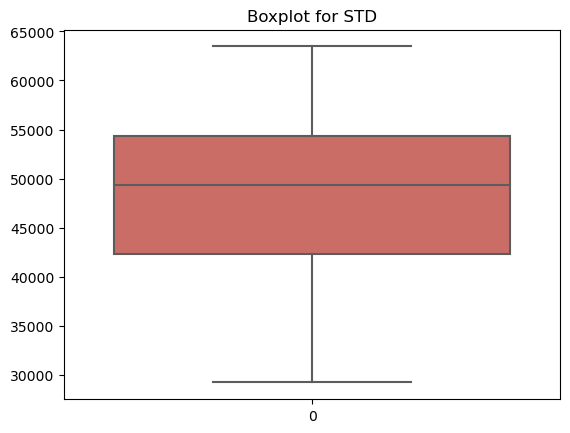

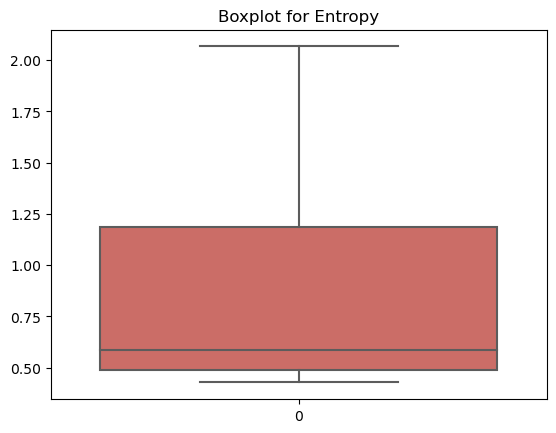

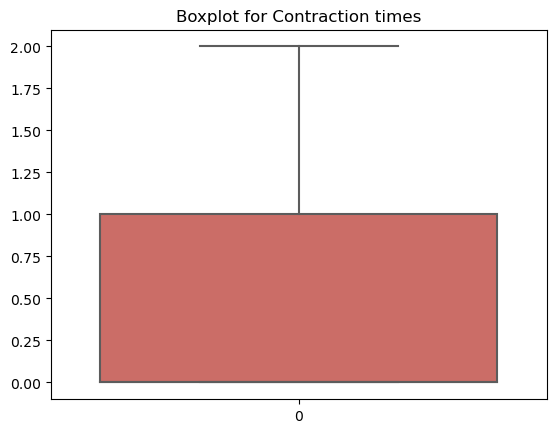

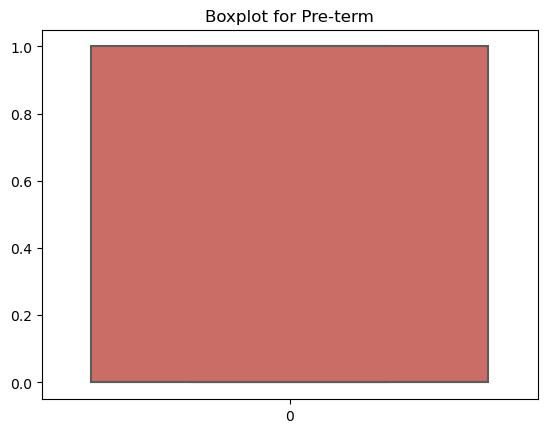

In [17]:
for y in df.columns:
    sns.boxplot(df[y],palette='hls',color="g")
    plt.title("Boxplot for " + y)
    plt.show()

# HORIZONTAL BAR GRAPH

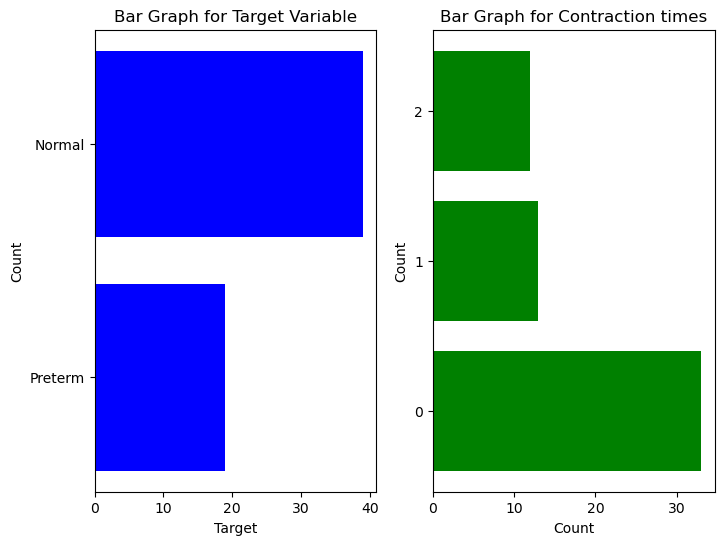

In [18]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
x=["Preterm","Normal"]
y=[19,39]
plt.barh(x,y,color='b')
plt.title("Bar Graph for Target Variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.subplot(1,2,2)
x=["0","1","2"]
y=[33,13,12]
plt.barh(x,y,color='g')
plt.title("Bar Graph for Contraction times")
plt.xlabel("Count")
plt.ylabel("Count")
plt.show()

# VIOLIN PLOT

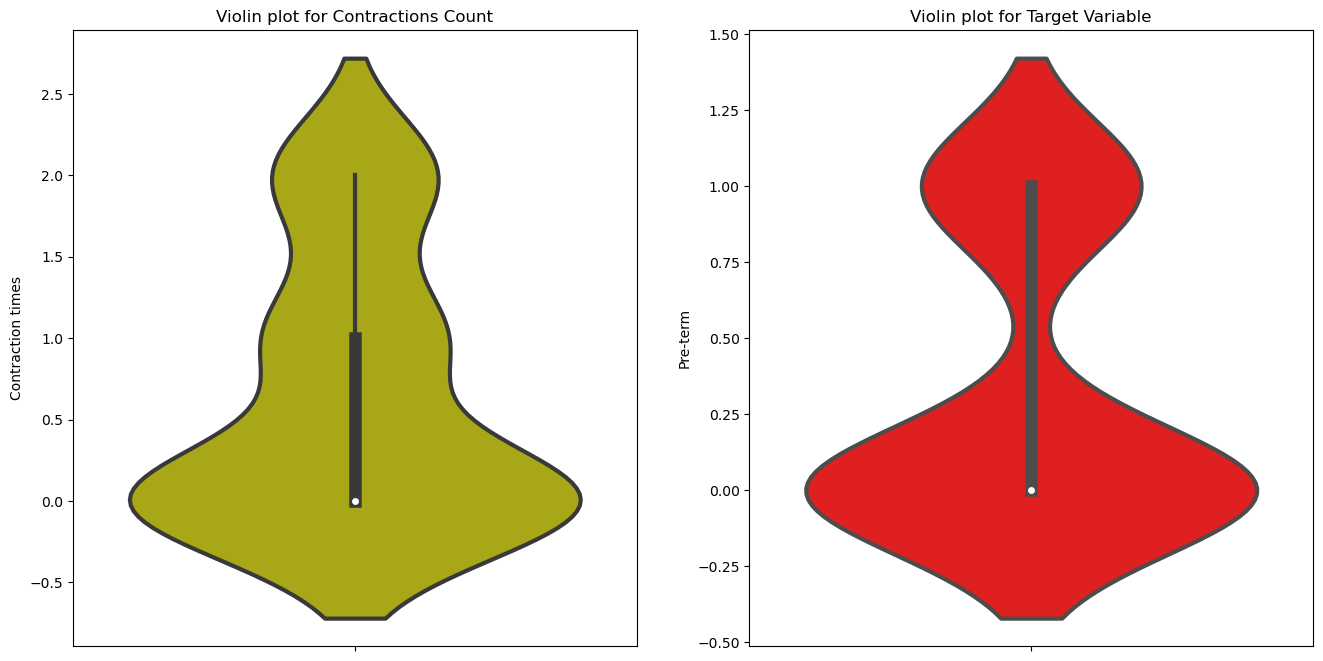

In [19]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Violin plot for Contractions Count")
sns.violinplot(y=df["Contraction times"],color="y",linewidth=3)
plt.subplot(1,2,2)
plt.title('Violin plot for Target Variable')
sns.violinplot(y=df["Pre-term"],color="r",linewidth=3)
plt.show()

# PIE CHART

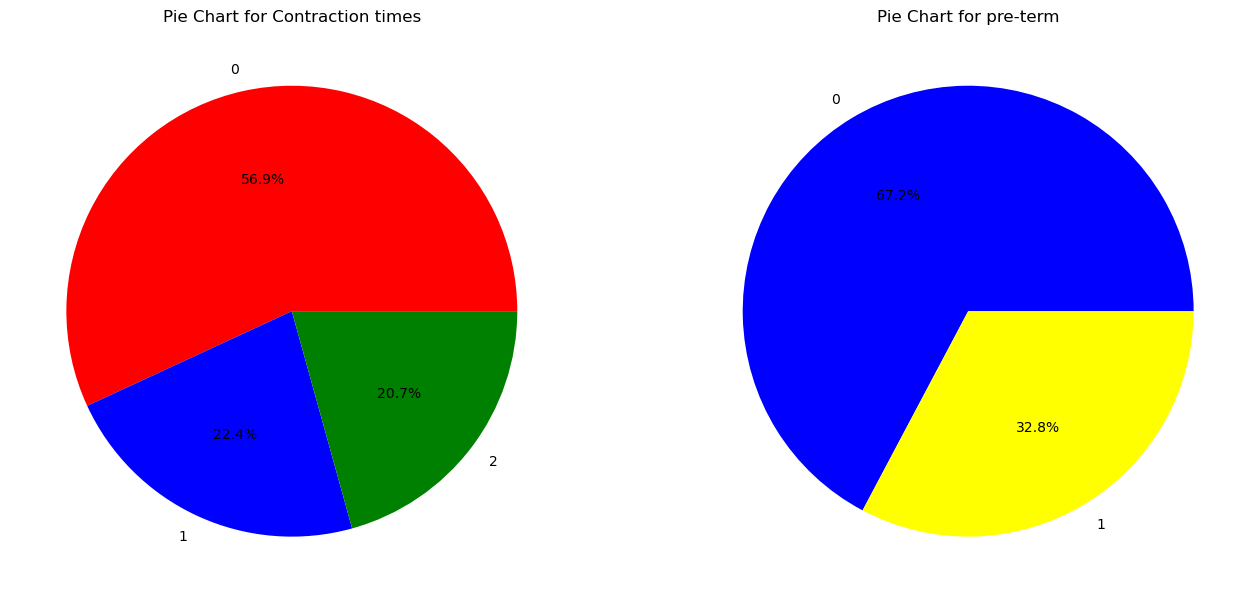

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
size=df["Contraction times"].value_counts()
labels=["0","1","2"]
color=['red','blue','green']
plt.title("Pie Chart for Contraction times")
plt.pie(size,colors=color,labels=labels,autopct='%2.1f%%')
plt.axis('off')
plt.subplot(1,2,2)
size=df["Pre-term"].value_counts()
labels=["0","1"]
color=['blue','yellow']
plt.title("Pie Chart for pre-term")
plt.pie(size,colors=color,labels=labels,autopct='%2.1f%%')
plt.show()

# CORRELATION COEFFICIENT

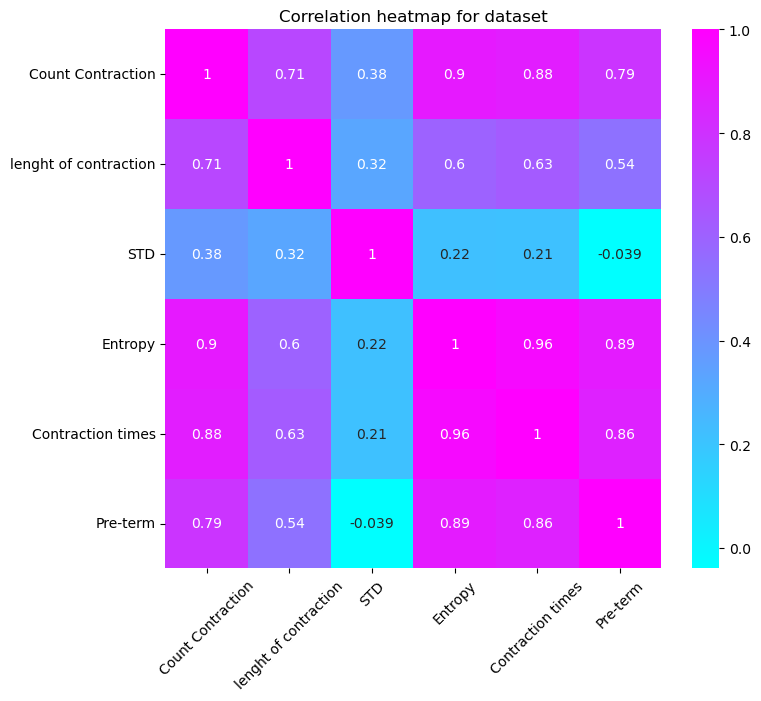

In [21]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True,cmap="cool")
plt.title('Correlation heatmap for dataset')
plt.xticks(rotation=45)
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [18]:
columns = ['Count Contraction', 'lenght of contraction', 'STD']
df1 = df[columns].copy()
df1

,Count Contraction,lenght of contraction,STD
0,11055,218320,53231.010
1,9118,222820,62367.488
2,7925,13481,60503.050
3,12451,17474,53628.078
4,11152,218320,53317.910
5,6029,63781,59177.965
6,10052,22310,54431.030
7,9101,219830,63467.583
8,7929,13192,61503.160
9,12452,16473,54678.091


In [20]:
df1=MinMaxScaler().fit_transform(df1)
df1 = pd.DataFrame(df1)

In [22]:
df = pd.concat([df,df1],axis=1)

In [23]:
df.drop(columns=columns,inplace=True)

In [24]:
df.rename(columns={0:'Count Contraction',1:'lenght of contraction',2:'STD'},inplace=True)

# DATA SEGREGATION

In [30]:
x=df.drop(['Pre-term'],axis=1)
y=df['Pre-term']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y.values.reshape(-1),test_size=0.25,random_state=0)

# MODEL BUILDING

# MODEL 1 - DECISION TREE

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)

In [31]:
dt1=DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2, min_samples_split= 4,class_weight='balanced')
dt1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_leaf=2, min_samples_split=4)

# PREDICTION FOR TEST VALUES -1

In [32]:
ypred1=dt1.predict(x_test)
ypred1

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

# MODEL  2 - RANDOM FOREST CLASSIFIER

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)

# HYPERPARAMTER TUNING FOR MODEL 2

In [36]:
from sklearn.model_selection import GridSearchCV
para_grid2={"max_depth":[4,5,6],
           "n_estimators":[250,500,600],
           "criterion":["entropy","gini"],
           "min_samples_split":[4,5,6],
           "min_samples_leaf":[2,3,4]}
gc2=GridSearchCV(rf,para_grid2,cv=5,verbose=1,n_jobs=-1)
gc2.fit(x_train,y_train)
print(gc2.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 250}


In [37]:
rf1=RandomForestClassifier(n_estimators= 250,criterion= 'entropy', max_depth= 4, min_samples_leaf= 2, min_samples_split= 4,class_weight='balanced')
rf1.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=250)

# PREDICTION FOR TEST VALUES - 2

In [38]:
ypred2=rf1.predict(x_test)
ypred2

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

# MODEL 3 - SUPPORT VECTOR CLASSIFIER

In [39]:
from sklearn.svm import SVC
sc=SVC()

# HYPERPARAMTER TUNING FOR MODEL 3

In [40]:
para_grid3={"C":[0.001, 0.01, 0.1, 1, 10, 100],
           "gamma":[0.001, 0.01, 0.1, 1, 10, 100],
           "kernel":["sigmoid","poly","rbf","linear"]}
gc3=GridSearchCV(sc,para_grid3,cv=5,verbose=1,n_jobs=-1)
gc3.fit(x_train,y_train)
print(gc3.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'C': 0.001, 'gamma': 100, 'kernel': 'poly'}


In [43]:
sc1=SVC(C= 0.001, gamma= 100, kernel='poly')
sc1.fit(x_train,y_train)

SVC(C=0.001, gamma=100, kernel='poly')

# PREDICTION FOR TEST VALUES - 3

In [44]:
ypred3=sc1.predict(x_test)
ypred3

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

# MODEL 4 - HYBRID / STACKED CLASSIFIER

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
estimators=[
    
    ("rf1",RandomForestClassifier(n_estimators= 250,criterion= 'entropy', max_depth= 4, min_samples_leaf= 2, min_samples_split= 4,class_weight='balanced')),
    ("sc1",SVC(C= 0.001, gamma= 100, kernel='poly'))]
stacked_classifier=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())
stacked_classifier.fit(x_train,y_train)

StackingClassifier(estimators=[('rf1',
                                RandomForestClassifier(class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=4,
                                                       min_samples_leaf=2,
                                                       min_samples_split=4,
                                                       n_estimators=250)),
                               ('sc1', SVC(C=0.001, gamma=100, kernel='poly'))],
                   final_estimator=LogisticRegression())

# PREDICTION FOR TEST VALUES - 4

In [46]:
ypred4=stacked_classifier.predict(x_test)
ypred4

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

# DEEP LEARNING MODEL ANN

In [96]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [48]:
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_dim=x_train.shape[1]),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
model.fit(x_train, y_train, epochs=15, batch_size=8, validation_data=(x_test, y_test))

Epoch 1/15
6/6 [==============================] - 3s 126ms/step - loss: 0.6540 - accuracy: 0.6512 - val_loss: 0.6177 - val_accuracy: 0.8667
Epoch 2/15
6/6 [==============================] - 0s 19ms/step - loss: 0.6124 - accuracy: 0.7209 - val_loss: 0.5827 - val_accuracy: 0.8667
Epoch 3/15
6/6 [==============================] - 0s 18ms/step - loss: 0.5795 - accuracy: 0.8140 - val_loss: 0.5484 - val_accuracy: 0.8667
Epoch 4/15
6/6 [==============================] - 0s 17ms/step - loss: 0.5488 - accuracy: 0.9535 - val_loss: 0.5146 - val_accuracy: 1.0000
Epoch 5/15
6/6 [==============================] - 0s 20ms/step - loss: 0.5177 - accuracy: 1.0000 - val_loss: 0.4817 - val_accuracy: 1.0000
Epoch 6/15
6/6 [==============================] - 0s 21ms/step - loss: 0.4879 - accuracy: 1.0000 - val_loss: 0.4482 - val_accuracy: 1.0000
Epoch 7/15
6/6 [==============================] - 0s 22ms/step - loss: 0.4579 - accuracy: 1.0000 - val_loss: 0.4181 - val_accuracy: 1.0000
Epoch 8/15
6/6 [==========

In [51]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

1/1 [==============================] - 0s 61ms/step - loss: 0.2197 - accuracy: 1.0000
Test Accuracy: 100.00%


In [52]:
predictions = model.predict(x_test)
predictions

1/1 [==============================] - 0s 267ms/step


array([[0.13484968],
       [0.17411365],
       [0.10473206],
       [0.26869008],
       [0.73657423],
       [0.7681684 ],
       [0.15661204],
       [0.09342764],
       [0.46787024],
       [0.14065918],
       [0.9156824 ],
       [0.9117214 ],
       [0.2647668 ],
       [0.15643987],
       [0.2267447 ]], dtype=float32)

# CONFUSION MATRIX FOR ALL MODELS

Confusion Matrix for decision tree classifier:

Axes(0.125,0.11;0.62x0.77)


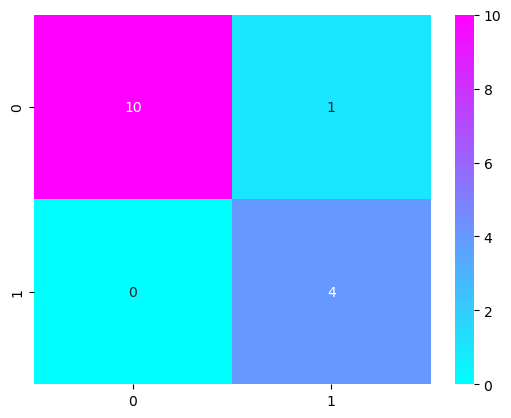

Confusion Matrix for Random Forest classifier:

Axes(0.125,0.11;0.62x0.77)


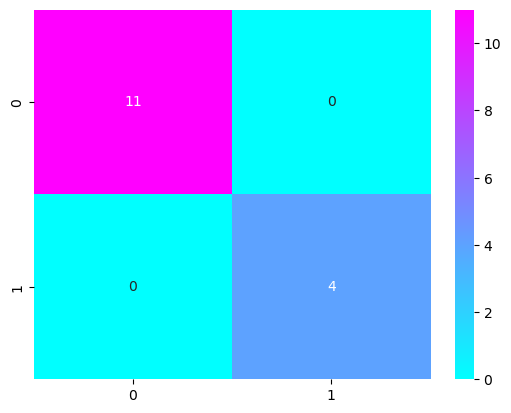

Confusion Matrix for support vector classifier:

Axes(0.125,0.11;0.62x0.77)


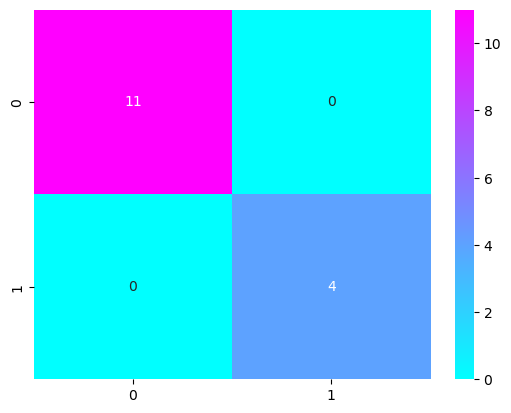

Confusion Matrix for stacking classifier:

Axes(0.125,0.11;0.62x0.77)


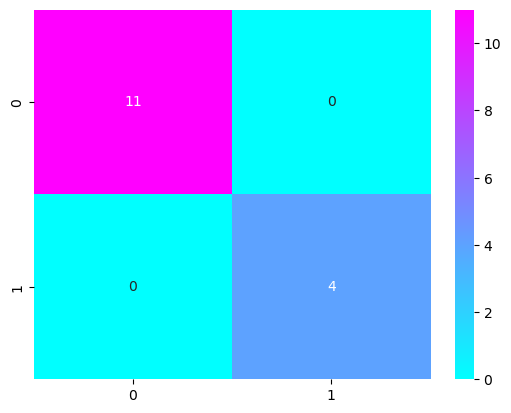

In [53]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix
cf1=confusion_matrix(y_test,ypred1)
print("Confusion Matrix for decision tree classifier:\n")
print(sns.heatmap(cf1,annot=True,cmap='cool'))
plt.show()
cf2=confusion_matrix(y_test,ypred2)
print("Confusion Matrix for Random Forest classifier:\n")
print(sns.heatmap(cf2,annot=True,cmap='cool'))
plt.show()
cf3=confusion_matrix(y_test,ypred3)
print("Confusion Matrix for support vector classifier:\n")
print(sns.heatmap(cf3,annot=True,cmap='cool'))
plt.show()
cf4=confusion_matrix(y_test,ypred4)
print("Confusion Matrix for stacking classifier:\n")
print(sns.heatmap(cf4,annot=True,cmap='cool'))
plt.show()

# EVALUTION METRICS FOR ALL MODELS

In [54]:
#ACCURACY SCORES
a1=accuracy_score(y_test,ypred1)
print("accuracy for model 1 is:",a1*100)
a2=accuracy_score(y_test,ypred2)
print("accuracy for model 2 is:",a2*100)
a3=accuracy_score(y_test,ypred3)
print("accuracy for model 3 is:",a3*100)
a4=accuracy_score(y_test,ypred4)
print("accuracy for model 4 is:",a4*100)

accuracy for model 1 is: 93.33333333333333
accuracy for model 2 is: 100.0
accuracy for model 3 is: 100.0
accuracy for model 4 is: 100.0


In [55]:
#PRECISION SCORES
p1=precision_score(y_test,ypred1)
print("Precision score for model 1 is:",p1*100)
p2=precision_score(y_test,ypred2)
print("Precision score for model 2 is:",p2*100)
p3=precision_score(y_test,ypred3)
print("Precision score for model 3 is:",p3*100)
p4=precision_score(y_test,ypred4)
print("Precision score for model 4 is:",p4*100)

Precision score for model 1 is: 80.0
Precision score for model 2 is: 100.0
Precision score for model 3 is: 100.0
Precision score for model 4 is: 100.0


In [56]:
#F1 SCORES
f1=f1_score(y_test,ypred1)
print('F1 score for model 1 is:',f1*100)
f2=f1_score(y_test,ypred2)
print('F1 score for model 2 is:',f2*100)
f3=f1_score(y_test,ypred3)
print('F1 score for model 3 is:',f3*100)
f4=f1_score(y_test,ypred4)
print('F1 score for model 4 is:',f4*100)

F1 score for model 1 is: 88.8888888888889
F1 score for model 2 is: 100.0
F1 score for model 3 is: 100.0
F1 score for model 4 is: 100.0


In [57]:
#Recall score
r1=recall_score(y_test,ypred1)
print("Recall score for model1 is:",r1*100)
r2=recall_score(y_test,ypred2)
print("Recall score for model2 is:",r2*100)
r3=recall_score(y_test,ypred3)
print("Recall score for model3 is:",r3*100)
r4=recall_score(y_test,ypred4)
print("Recall score for model4 is:",r4*100)

Recall score for model1 is: 100.0
Recall score for model2 is: 100.0
Recall score for model3 is: 100.0
Recall score for model4 is: 100.0


# ANALYSIS OF METRICS

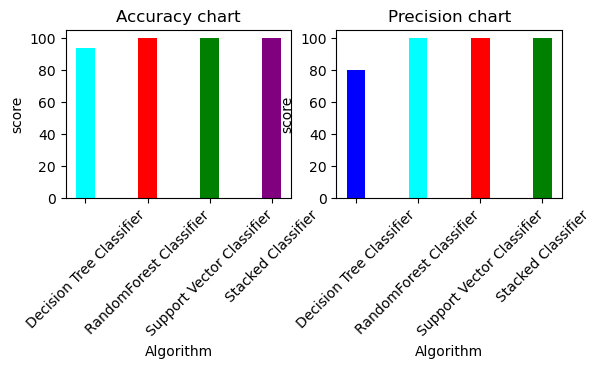

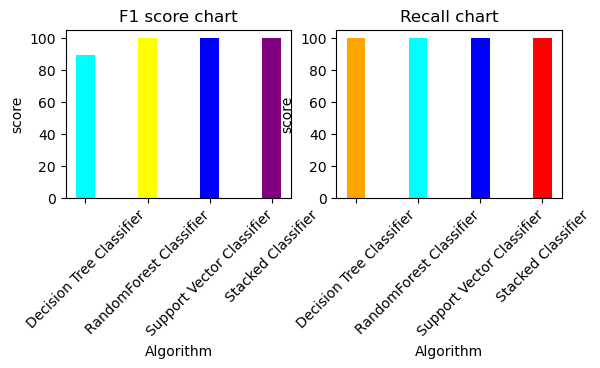

In [58]:
colors=['red','green','blue','yellow','orange','purple','cyan']
alg=["Decision Tree Classifier","RandomForest Classifier","Support Vector Classifier","Stacked Classifier"]
scores4=[100,100,100,100]
scores1=[93.33,100,100,100]
scores2=[80,100,100,100]
scores3=[88.88,100,100,100]
plt.subplot(2,2,1)
plt.title("Accuracy chart")
plt.bar(alg,scores1,width=0.3,color=rd.sample(colors,4))
plt.xlabel("Algorithm")
plt.ylabel("score")
plt.xticks(rotation=45)
plt.subplot(2,2,2)
plt.title("Precision chart")
plt.bar(alg,scores2,width=0.3,color=rd.sample(colors,4))
plt.xlabel("Algorithm")
plt.ylabel("score")
plt.xticks(rotation=45)
plt.show()
plt.subplot(2,2,3)
plt.title("F1 score chart")
plt.bar(alg,scores3,width=0.3,color=rd.sample(colors,4))
plt.xlabel("Algorithm")
plt.ylabel("score")
plt.xticks(rotation=45)
plt.subplot(2,2,4)
plt.title("Recall chart")
plt.bar(alg,scores4,width=0.3,color=rd.sample(colors,4))
plt.xlabel("Algorithm")
plt.ylabel("score")
plt.xticks(rotation=45)
plt.show()

# PREDICTION WITH USER PROMPTS

In [104]:
a=int(input("Enter Count Contraction:"))
b=int(input("Enter Length of contraction:"))
c=float(input("Enter STD:"))
d=float(input("Enter Entropy:"))
e=int(input("Enter contraction times:"))
pre=stacked_classifier.predict([[a,b,c,d,e]])
if pre==1:
    print("Pre Term Baby\nTake Care\nconsult doctor\ndon't drink alcohol\nYour child will get affected")
else:
    print("Your baby will born on time of delivery\nTake care")

Enter Count Contraction:11033
Enter Length of contraction:218120
Enter STD:53231.01
Enter Entropy:1.80
Enter contraction times:2
Pre Term Baby
Take Care
consult doctor
don't drink alcohol
Your child will get affected
